# Psychophysics - Analyse des données
# Tache de classification
On va faire une regression logistique des données obtenues en psychophysiques, pour chercher le seuil B_theta vers lequel les gens perdent en performances. On le comparera ensuite qualitativement au performances du modèle pour essayer de valider sa plausibilité neurobiologique. 

In [6]:
%ls ../psychophysics_data/Psychophys_*.p

../psychophysics_data/Psychophys_discrim_2018-06-06_0648_LP.p
../psychophysics_data/Psychophys_discrim_2018-06-06_HL.p
../psychophysics_data/Psychophys_discrim_2018-06-06_LP.p
../psychophysics_data/Psychophys_discrim_LP.p
../psychophysics_data/Psychophys_discrim_MP.p


In [16]:
import pickle
import matplotlib.pyplot as plt

subj_name_list =  ['PA', 'DL', 'HL', 'MP', 'CR']
subj_name_list =  ['2018-06-06_0648_LP', 'LP', 'MP', '2018-06-06_HL']
subj_data_list = []

for subject in subj_name_list :
    # x = pickle.load(open('../psychophysics_data/Psychophys_outlist_subj%s.p'%subject, 'rb'))

    x = pickle.load(open('../psychophysics_data/Psychophys_discrim_%s.p'%subject, 'rb'))

    subj_data_list.append(x)

En utilisant le modèle de régression logistique de scikit-learn, on fait un modèle pour chaque sujet :

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(1, 175, 100)
x_plot = np.reshape(x_values, (100,1))

for num, subj_data in enumerate(subj_data_list) :
    X = []
    for i in subj_data :
        X.append(i[0])

    y =[]
    for i in subj_data :
        y.append(i[1])
    
    #reshaped for fitting
    X = np.asarray(X)
    X = X[:,np.newaxis]
    
    #logistic regression
    lgs = LogisticRegression(C = 3, max_iter = 100, penalty = 'l1' ,class_weight = {1 : 1.5 , 0 : 1}) 
    lgs.fit(X, y)
    y_values = lgs.predict_proba(x_plot)[:,1]
    plt.plot(x_values, y_values, label = 'LogReg')

    plt.scatter(X, y, c='r', s=2)
    plt.title('Psychophysic curve - %s' % subj_name_list[num])
    plt.xlabel("B theta")
    plt.ylabel("Subject answered correctly")
    plt.legend()
    plt.show()

ValueError: Unknown label type: 'continuous'

On peut aussi faire un modèle global qui moyenne toutes les données :

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(1, 175, 100)
x_plot = np.reshape(x_values, (100,1))

#get all subject variables
merged_X = []
merged_y = []
for subj_data in subj_data_list :
    X = []
    for i in subj_data :
        X.append(i[0])
    merged_X+=X
                    
for subj_data in subj_data_list :
    y =[]
    for i in subj_data :
        y.append(i[1])
    
    merged_y+=y
    
#reshaped for fitting
X = np.asarray(merged_X)
X = X[:,np.newaxis]

#logistic regression
lgs = LogisticRegression(C = 3, max_iter = 100, penalty = 'l1' ,class_weight = {1 : 1.5 , 0 : 1}) 
lgs.fit(X, merged_y)
y_values = lgs.predict_proba(x_plot)[:,1]
plt.plot(x_values, y_values, label = 'LogReg')

plt.scatter(X, merged_y, c='r', s=2)
plt.xlabel("B_theta")
plt.ylabel("Subjects answered correctly")
plt.legend()
plt.show()

ValueError: Unknown label type: 'continuous'

# Tache de discrimination 

In [24]:
import pickle
import matplotlib.pyplot as plt

#subj_name_list =  ['HL', 'LP', 'MP']
subj_name_list =  ['2018-06-06_0648_LP', 'LP', 'MP', '2018-06-06_HL']

subj_name_list =  ['2018-06-06_0648_LP', '2018-06-06_LP', '2018-06-06_HL']



subj_data_list = []

for subject in subj_name_list :
#    x = pickle.load(open('Psychophys_discrim_2018-06-06_%s.p'%subject, 'rb'))
    x = pickle.load(open('../psychophysics_data/Psychophys_discrim_%s.p'%subject, 'rb'))

    subj_data_list.append(x)

In [25]:
subj_data_list

[[[0, -0.13329855727470966, 'left', 3.141592653589793],
  [1, 0.16274147651806384, 'right', 0.2776801836348979],
  [2, 0.5665523443574485, 'right', 0.02454369260617026],
  [3, -0.20369063343926264, 'left', 0.9340010840223152],
  [4, 0.11040673167395379, 'right', 0.08255481251847067],
  [5, -0.15829874115094447, 'left', 0.08255481251847067],
  [6, -0.21525836782205843, 'left', 0.02454369260617026],
  [7, -0.4390405209817255, 'left', 0.02454369260617026],
  [8, 0.018395324230529614, 'right', 0.08255481251847067],
  [9, -0.2161833919540858, 'left', 3.141592653589793],
  [10, 0.7853981633974483, 'right', 0.02454369260617026],
  [11, -0.24894138672348198, 'left', 0.2776801836348979],
  [12, -0.31347808666888555, 'left', 0.2776801836348979],
  [13, 0.19396829275368555, 'left', 0.9340010840223152],
  [14, 0.7853981633974483, 'right', 0.2776801836348979],
  [15, -0.40254035694886897, 'left', 3.141592653589793],
  [16, -0.27795593646672956, 'left', 0.2776801836348979],
  [17, 0.4887139532073362

En sujet individuel et en utilisant tout les B_theta:

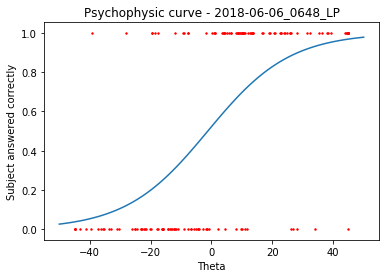

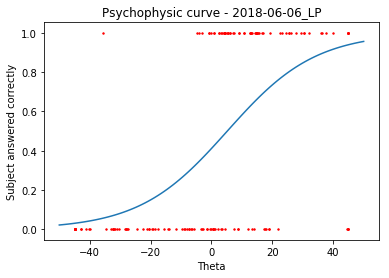

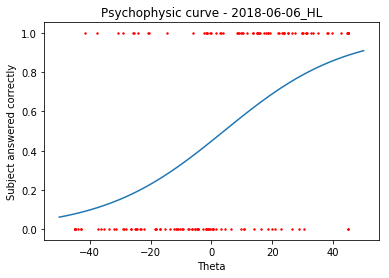

In [30]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))

for num, subj_data in enumerate(subj_data_list) :
    X = []
    for i in subj_data :
        #X.append(i[3]*180/np.pi)
        X.append(i[1]*180/np.pi)

    y =[]
    for i in subj_data :
        if False:
            # fitting if correct 
            if np.sign(i[1]) > 0 and i[2] == 'right':
                y.append(1)
            else :
                y.append(0)
            #y.append(i[1])
        else:
            # fitting with direction 
            if i[2] == 'right':
                y.append(1)
            else :
                y.append(0)
            #y.append(i[1])

    
    #reshaped for fitting
    X = np.asarray(X)
    X = X[:,np.newaxis]
    
    #logistic regression
    lgs = LogisticRegression(C = 3, max_iter = 100, penalty = 'l1' ,class_weight = {1 : 1 , 0 : 1}) 
    lgs.fit(X, y)
    y_values = lgs.predict_proba(x_plot)[:,1]
    plt.plot(x_values, y_values, label = 'LogReg')

    plt.scatter(X, y, c='r', s=2)
    plt.title('Psychophysic curve - %s' % subj_name_list[num])
    plt.xlabel("Theta")
    plt.ylabel("Subject answered correctly")
    #plt.legend()
    plt.show()

En sujet individuel avec une courbe par B_theta :

In [27]:
b_thetas_list = []
for x in subj_data_list[1] :
    b_thetas_list.append(x[3]*180/np.pi)

b_thetas_list = sorted(set(b_thetas_list))
print(b_thetas_list)

[1.40625, 4.730042335802144, 15.90990257669732, 53.51432017512245, 180.0]


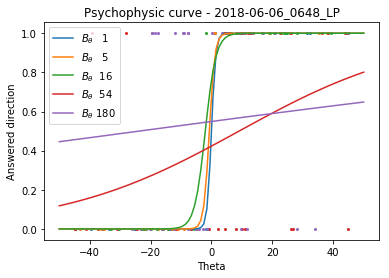

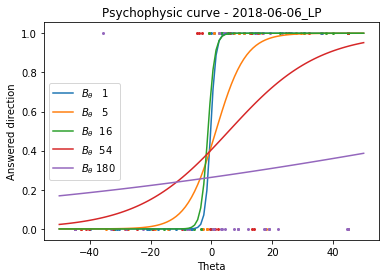

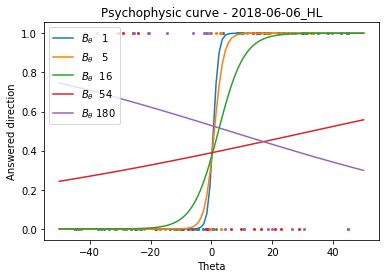

In [37]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#the values used for plotting once the model is built
x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))

lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})

for num, subj_data in enumerate(subj_data_list) :
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y =[]

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if False:
                    # fitting if correct 
                    if np.sign(i[1]) > 0 and i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
                    #y.append(i[1])
                else:
                    # fitting with direction 
                    if i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
                    #y.append(i[1])


        #reshaped for fitting
        X = np.asarray(X)
        X = X[:,np.newaxis]

        #logistic regression
        lgs = LogisticRegression(**lr_kwargs) 
        lgs.fit(X, y)
        y_values = lgs.predict_proba(x_plot)[:,1]
        plt.plot(x_values, y_values, label = r'$B_\theta$ %3.f' %b_theta)
        plt.scatter(X, y, s=4)
    plt.title('Psychophysic curve - %s' % subj_name_list[num])
    plt.xlabel("Theta")
    plt.ylabel("Answered direction")
    plt.legend()
    plt.show()